<b> Preparation <b/>

In [1]:
!pip install ipyvolume

import ipyvolume as ipv
import numpy as np # maths
import matplotlib as mpl
import matplotlib.pyplot as plt

You should consider upgrading via the 'C:\Users\nasta\anaconda3\python.exe -m pip install --upgrade pip' command.


<b> Color Blending for Direct Volume Rendering <b/>

In [2]:
# colors to be blended
# At position 0 is the background color which is white with alpha 1 (opaque).
# Position 1 to 3 are the colored cubes you have to blend.
case1 = np.array([(1, 1, 1, 1), (0, 0, 1, 0.3), (0, 1, 0, 0.3), (1, 0, 0, 0.3)])
case2 = np.array([(1, 1, 1, 1), (1, 0, 0, 0.3), (0, 1, 0, 0.3), (0, 0, 1, 0.3)])
case3 = np.array([(1, 1, 1, 1), (0, 1, 0, 0.5), (0.5, 0.0, 0.5, 0.5), (1, 0.5, 0.5, 0.5)])
case4 = np.array([(1, 1, 1, 1), (0.5, 1, 0.5, 1), (1, 0.0, 0.5, 1), (1, 0.5, 0.5, 1)])
cases = [case1, case2, case3, case4]

# Default color for last box
# Overwirte this by you blending result.
results_blending = np.array([(0.643,0.553,0.49,1),(0.49,0.553,0.643,1),(0.75,0.5,0.5,1),(1,0.5,0.5,1)])

In [3]:
##########################################
# Do the color blending here.
# Write you results in `results_blending`
# to use the code for the plot below.
##########################################
#-----case 1------------------------------
#starting from background to blue-----------------------
#formula is : C1 = C1*( 1- a0 ) + C0 * a0
#a0=1 
#c0=1, 1, 1
#c1=c0=1, 1, 1
#starting from blue to green----------------------------
#formula is : C2 = C2*( 1- a1 ) + C1* a1
#a1=0.3 
#a2=0.3
#c1=0, 0, 1
#c2=0, 1, 0
#c2=c2(0.7)+c1(0.3)=0, 0.7, 0 + 0, 0, 0.3 = 0, 0.7, 0.3
#--und so weiter-----
#the code:
my_results_blending=np.empty(shape=(4,4))
i=0
for eachcase in cases:
    C0_old=eachcase[0, 0:3]
    C1_old=eachcase[1, 0:3]
    C2_old=eachcase[2, 0:3]
    C3_old=eachcase[3, 0:3]
    #-----------------
    a0=eachcase[0,-1]
    a1=eachcase[1,-1]
    a2=eachcase[2,-1]
    a3=eachcase[3,-1]
    #-------new values----
    #C1_new=C0_old*a0 + (1-a0)*C1_old
    #C2_new=C1_new*a1 + (1-a1)*C2_old
    #C3_new=C2_new*a2 + (1-a2)*C3_old

    #-------new values----
    C1_new=C0_old*(1-a1)+C1_old*a1
    C2_new=C1_new*(1-a2)+C2_old*a2
    C3_new=C2_new*(1-a3)+C3_old*a3
    #--------------------
    
    my_results_blending[i,0:3]=C3_new
    print(C3_new)
    my_results_blending[i,-1]=a3
    i+=1

print(my_results_blending)
# e.g. you can get the rgb color tupel and the alpha value like this
rgb = case1[1, 0:3]
a = case1[1,-1]

[0.643 0.553 0.49 ]
[0.49  0.553 0.643]
[0.75 0.5  0.5 ]
[1.  0.5 0.5]
[[0.643 0.553 0.49  0.3  ]
 [0.49  0.553 0.643 0.3  ]
 [0.75  0.5   0.5   0.5  ]
 [1.    0.5   0.5   1.   ]]


<b> Visualize the Results <b/>

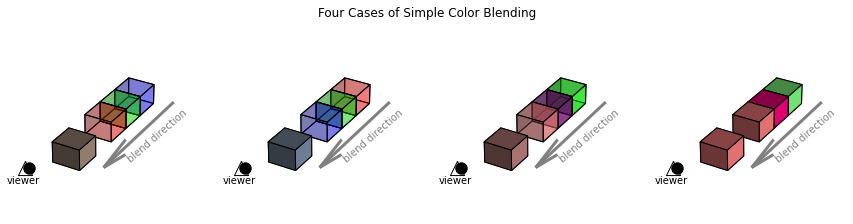

In [4]:
def draw_blocks(ax, blocks, resulting_color):
  ax.set_xlim3d(1, 0)
  ax.set_ylim3d(1, 0)
  ax.set_zlim3d(1, 0)
  ax.axis('off')
  ax.text(0.3, 0.5, 1, "blend direction", (0,1,-0.07), color='grey')
  ax.text(1.2, 1, 1.3, "viewer", color='k')
  ax.scatter(1, 1, 1, color=(0,0,0,0),edgecolor='k', s=200, marker='^')
  ax.scatter(0.97, 0.98, 1, color='k', s=130, marker='o')

  ax.bar3d(
      0.3, 0, 0.3, 0.25, 0.25, 0.25,
      color=(blocks[1,0], blocks[1,1], blocks[1,2], blocks[1,3]),
      edgecolor='black')
  ax.bar3d(
      0.3, 0.25, 0.3, 0.25, 0.25, 0.25,
      color=(blocks[2,0], blocks[2,1], blocks[2,2], blocks[2,3]),
      edgecolor='black')
  ax.bar3d(
      0.3, 0.5, 0.3, 0.25, 0.25, 0.25,
      color=(blocks[3,0], blocks[3,1], blocks[3,2], blocks[3,3]),
      edgecolor='black')

  ax.bar3d(
      0.3, 1, 0.3, 0.25, 0.25, 0.25,
      color= resulting_color,
      edgecolor='black')

  ax.quiver(0.07, 0.07, 0.4, 0, 1, 0, length=1.20, linewidths=3, color='grey')
  ax.margins(y=1.05)


fig, axs = plt.subplots(1, 4, constrained_layout=True, figsize=(len(cases)*3, 3), subplot_kw={'projection':'3d'})
fig.suptitle('Four Cases of Simple Color Blending')
for ax, case, resulting_color in zip(axs, cases, results_blending):
  draw_blocks(ax, case, resulting_color)
#plt.tight_layout()
plt.show()